<a href="https://colab.research.google.com/github/segnig/-segnig-International-Women-s-Day-Zindi-Challenge-/blob/main/International_Women's_Day_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install gdown --q

In [3]:
import gdown

TRAIN_FILE_ID = "1k39tvexhAVC4ST2nCHgm_K_pJLr1gB3W"
TEST_FILE_ID = "1G3ufnmlIz0gf0LtYhXEXYXfev1Vop8Rt"
VAR_DEF_ID = "1zR-1bbIhnhCZGQXYn6FvIc9w-nCTwNJN"
SUB_FILE_ID = "1bp-wU0z1zaml5RK3aksiOuiXi1nR59Ci"

gdown.download(id=TRAIN_FILE_ID, output="Train.csv", quiet=False)
gdown.download(id=TEST_FILE_ID, output="Test.csv", quiet=False)
gdown.download(id=VAR_DEF_ID, output="VariableDefinitions.csv", quiet=False)
gdown.download(id=SUB_FILE_ID, output="SampleSubmission.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k39tvexhAVC4ST2nCHgm_K_pJLr1gB3W
To: /content/Train.csv
100%|██████████| 2.05M/2.05M [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G3ufnmlIz0gf0LtYhXEXYXfev1Vop8Rt
To: /content/Test.csv
100%|██████████| 1.11M/1.11M [00:00<00:00, 43.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zR-1bbIhnhCZGQXYn6FvIc9w-nCTwNJN
To: /content/VariableDefinitions.csv
100%|██████████| 4.39k/4.39k [00:00<00:00, 8.76MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bp-wU0z1zaml5RK3aksiOuiXi1nR59Ci
To: /content/SampleSubmission.csv
100%|██████████| 20.9k/20.9k [00:00<00:00, 31.1MB/s]


'SampleSubmission.csv'

In [4]:
# FILE_PATH = "/content/drive/MyDrive/Data Science/International Women's Day Challenge/"

In [5]:
! pip install catboost --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


## Import LIB

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# split train and test data
from sklearn.model_selection import train_test_split

# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# import model boosting model, linear model, random forest regression model

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
# Root Mean Squared Error.

# drop constant features
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import seaborn as sns

print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")

numpy: 2.0.2
pandas: 2.2.2
scikit-learn: 1.6.1
matplotlib: 3.10.0
seaborn: 0.13.2


In [8]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
var_data_df = pd.read_csv("VariableDefinitions.csv")
sub_df = pd.read_csv("SampleSubmission.csv")


In [9]:
print(train.shape)
print(test.shape)

(2822, 63)
(1013, 62)


In [10]:
print("Dataset Infomation")

print(f"Train dataset has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test dataset has {test.shape[0]} rows and {test.shape[1]} columns")

print(f"Train dataset has {train.shape[0] - train.dropna().shape[0]} missing values")
print(f"Test dataset has {test.shape[0] - test.dropna().shape[0]} missing values")


print(f"Train dataset has {train.duplicated().sum()} duplicated values")
print(f"Test dataset has {test.duplicated().sum()} duplicated values")


print(f"Train dataset has {train.columns[train.isna().any()].tolist()} missing values")
print(f"Test dataset has {test.columns[test.isna().any()].tolist()} missing values")


print("=================")

print("Train dataset info")
print(train.info())
print("=================")
print("Test dataset info")
print(test.info())

Dataset Infomation
Train dataset has 2822 rows and 63 columns
Test dataset has 1013 rows and 62 columns
Train dataset has 0 missing values
Test dataset has 0 missing values
Train dataset has 0 duplicated values
Test dataset has 0 duplicated values
Train dataset has [] missing values
Test dataset has [] missing values
Train dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              282

## **Modeling with without Feature Selection**



In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

train_features = [col for col in train.select_dtypes(include="number").columns if col != "target"]

X = train[train_features]
y = train["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")

RMSE: 3.373031258660821


In [16]:
var_def_dict = dict(zip(var_data_df["Column"], var_data_df["Description"]))

from  IPython.display import display, Markdown

for feature, description in var_def_dict.items():
    display(Markdown(f"* **{feature}** : {description}"))

* **dw_00** : Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm

* **dw_01** : Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials

* **dw_02** : Percentage of dwellings of type: Flat or apartment in a block of flats

* **dw_03** : Percentage of dwellings of type: Cluster house in complex

* **dw_04** : Percentage of dwellings of type: Townhouse (semi-detached house in a complex)

* **dw_05** : Percentage of dwellings of type: Semi-detached house

* **dw_06** : Percentage of dwellings of type: House/flat/room in backyard

* **dw_07** : Percentage of dwellings of type: Informal dwelling (shack

* **dw_08** : Percentage of dwellings of type: Informal dwelling (shack

* **dw_09** : Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat

* **dw_10** : Percentage of dwellings of type: Caravan/tent

* **dw_11** : Percentage of dwellings of type: Other

* **dw_12** : Percentage of dwellings of type: Unspecified

* **dw_13** : Percentage of dwellings of type: Not applicable

* **psa_00** : Percentage listing present school attendance as:  Yes

* **psa_01** : Percentage listing present school attendance as:  No

* **psa_02** : Percentage listing present school attendance as:  Do not know

* **psa_03** : Percentage listing present school attendance as:  Unspecified

* **psa_04** : Percentage listing present school attendance as:  Not applicable

* **stv_00** : Percentage of households with Satellite TV:  Yes

* **stv_01** : Percentage of households with Satellite TV:  No

* **car_00** : Percentage of households with a car:  Yes

* **car_01** : Percentage of households with a car:  No

* **lln_00** : Percentage listing landline ownership as:  Yes

* **lln_01** : Percentage listing landline ownership as:  No

* **lan_00** : Percentage listing language as:  Afrikaans

* **lan_01** : Percentage listing language as:  English

* **lan_02** : Percentage listing language as:  IsiNdebele

* **lan_03** : Percentage listing language as:  IsiXhosa

* **lan_04** : Percentage listing language as:  IsiZulu

* **lan_05** : Percentage listing language as:  Sepedi

* **lan_06** : Percentage listing language as:  Sesotho

* **lan_07** : Percentage listing language as:  Setswana

* **lan_08** : Percentage listing language as:  Sign language

* **lan_09** : Percentage listing language as:  SiSwati

* **lan_10** : Percentage listing language as:  Tshivenda

* **lan_11** : Percentage listing language as:  Xitsonga

* **lan_12** : Percentage listing language as:  Other

* **lan_13** : Percentage listing language as:  Unspecified

* **lan_14** : Percentage listing language as:  Not applicable

* **pg_00** : Percentage in population group:  Black African

* **pg_01** : Percentage in population group:  Coloured

* **pg_02** : Percentage in population group:  Indian or Asian

* **pg_03** : Percentage in population group:  White

* **pg_04** : Percentage in population group:  Other

* **lgt_00** : Percentage using electricity for lighting

* **pw_00** : Percentage with piped water access:  Piped (tap) water inside dwelling/institution

* **pw_01** : Percentage with piped water access:  Piped (tap) water inside yard

* **pw_02** : Percentage with piped water access:  Piped (tap) water on community stand: distance less than 200m from dwelling/institution

* **pw_03** : Percentage with piped water access:  Piped (tap) water on community stand: distance between 200m and 500m from dwelling/institution

* **pw_04** : Percentage with piped water access:  Piped (tap) water on community stand: distance between 500m and 1000m (1km) from dwelling /institution

* **pw_05** : Percentage with piped water access:  Piped (tap) water on community stand: distance greater than 1000m (1km) from dwelling/institution

* **pw_06** : Percentage with piped water access:  No access to piped (tap) water

* **pw_07** : Percentage with piped water access:  Unspecified

* **pw_08** : Percentage with piped water access:  Not applicable

* **ADM4_PCODE** : Code for linking row to ward in the wards shapefile

* **lat** : Lattitude of the center point of the ward

* **lon** : Longitude of the center point of the ward

* **NL** : Nightlights value for the area arounf (lat, lon)

* **target** : Percentage of women head households with income under R19.6k out of total number of households

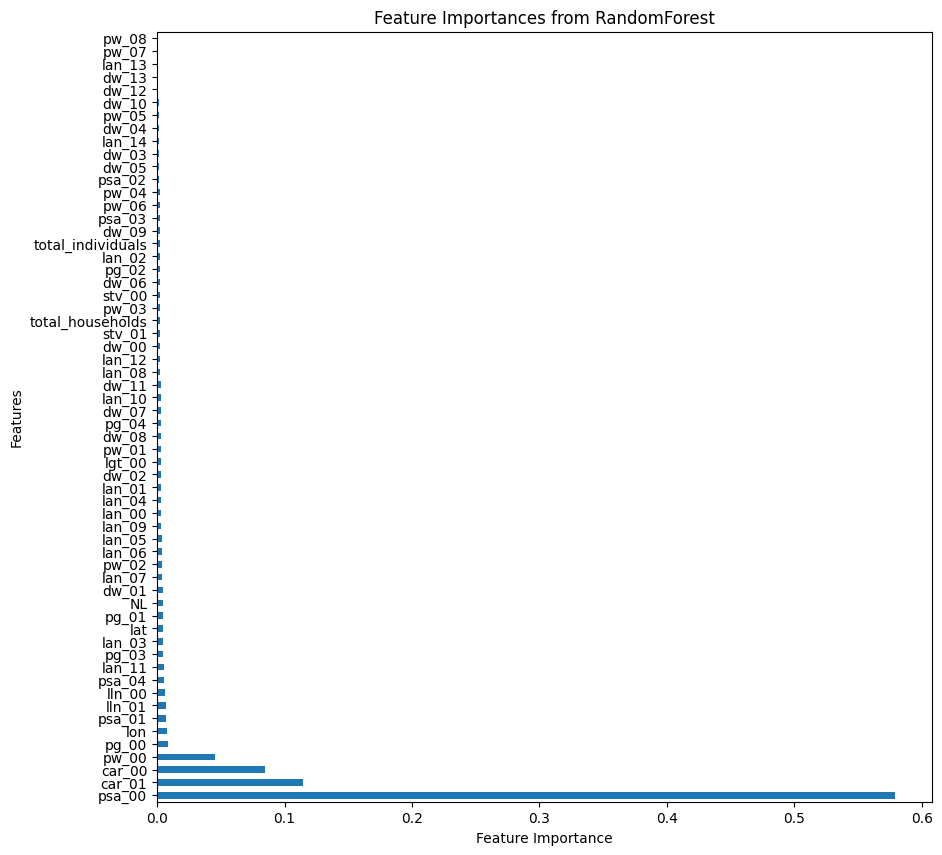

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = train_features



feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 10))
feat_importances.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from RandomForest')
plt.show()

In [17]:
# submission file
test_preds = model.predict(test[train_features])
test["target"] = test_preds

test[["ward", "target"]].to_csv("submission_random_model_without_feature_selection.csv", index=False)

test[["ward", "target"]].head()

,ward,target
0,21001001: Ward 1,18.490138
1,21001002: Ward 2,13.109853
2,21001003: Ward 3,21.497258
3,21001004: Ward 4,17.136652
4,21001005: Ward 5,20.632600


In [24]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

model_cat = CatBoostRegressor()

model_cat.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)

y_pred = model_cat.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")

Learning rate set to 0.057863
0:	learn: 9.9608668	test: 9.5139240	best: 9.5139240 (0)	total: 40.7ms	remaining: 40.7s
100:	learn: 3.1560199	test: 3.4228570	best: 3.4228570 (100)	total: 3.16s	remaining: 28.1s
200:	learn: 2.5312180	test: 3.2003751	best: 3.2003751 (200)	total: 4.61s	remaining: 18.3s
300:	learn: 2.0614493	test: 3.1090304	best: 3.1090304 (300)	total: 6.06s	remaining: 14.1s
400:	learn: 1.7335908	test: 3.0701339	best: 3.0683611 (394)	total: 7.51s	remaining: 11.2s
500:	learn: 1.4754860	test: 3.0366549	best: 3.0366549 (500)	total: 8.98s	remaining: 8.95s
600:	learn: 1.2645444	test: 3.0121798	best: 3.0120775 (599)	total: 10.7s	remaining: 7.12s
700:	learn: 1.0852996	test: 3.0049120	best: 3.0049120 (700)	total: 13.8s	remaining: 5.91s
800:	learn: 0.9408191	test: 2.9986559	best: 2.9977706 (756)	total: 15.5s	remaining: 3.86s
900:	learn: 0.8145543	test: 2.9942190	best: 2.9929068 (856)	total: 17s	remaining: 1.87s
999:	learn: 0.7058379	test: 2.9887854	best: 2.9874532 (986)	total: 18.4s	re

In [28]:
test["target"] = model_cat.predict(test[train_features])

test[["ward", "target"]].to_csv("submission_cat_model_without_feature_selection.csv", index=False)

# to file
test[["ward", "target"]].head()

,ward,target
0,21001001: Ward 1,18.490138
1,21001002: Ward 2,13.109853
2,21001003: Ward 3,21.497258
3,21001004: Ward 4,17.136652
4,21001005: Ward 5,20.632600


In [30]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()

model_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)

y_pred = model_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")

test["target"] = model_xgb.predict(test[train_features])

test[["ward", "target"]].to_csv("submission_xgb_model_without_feature_selection.csv", index=False)

test[["ward", "target"]].head()

[0]	validation_0-rmse:7.55806
[99]	validation_0-rmse:3.41128
RMSE: 3.411280284615366


,ward,target
0,21001001: Ward 1,18.313097
1,21001002: Ward 2,11.573820
2,21001003: Ward 3,18.432920
3,21001004: Ward 4,15.976620
4,21001005: Ward 5,21.070574


In [31]:
from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor()

model_lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred = model_lgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14025
[LightGBM] [Info] Number of data points in the train set: 2257, number of used features: 55
[LightGBM] [Info] Start training from score 24.512353
RMSE: 3.1763752466083535


In [33]:
test["target"] = model_lgb.predict(test[train_features])

test[["ward", "target"]].to_csv("submission_lgb_model_without_feature_selection.csv", index=False)

test[["ward", "target"]].head()

,ward,target
0,21001001: Ward 1,16.950257
1,21001002: Ward 2,14.109041
2,21001003: Ward 3,19.547016
3,21001004: Ward 4,17.404880
4,21001005: Ward 5,20.521051


## More EDA

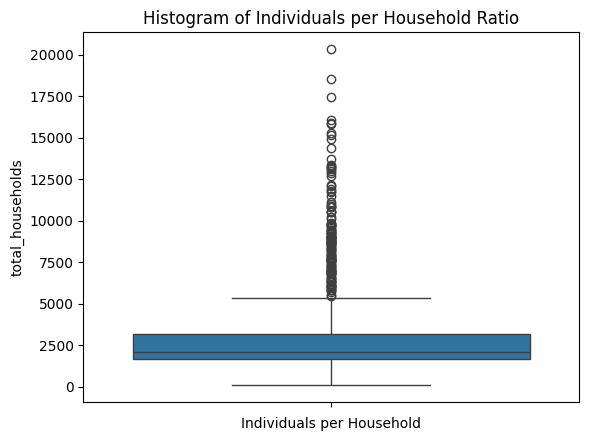

In [34]:
sns.boxplot(test["total_households"])
plt.xlabel("Individuals per Household")
plt.title("Histogram of Individuals per Household Ratio")
plt.show()

## Features Variance
* The feature has low variance and conveys minimal information.

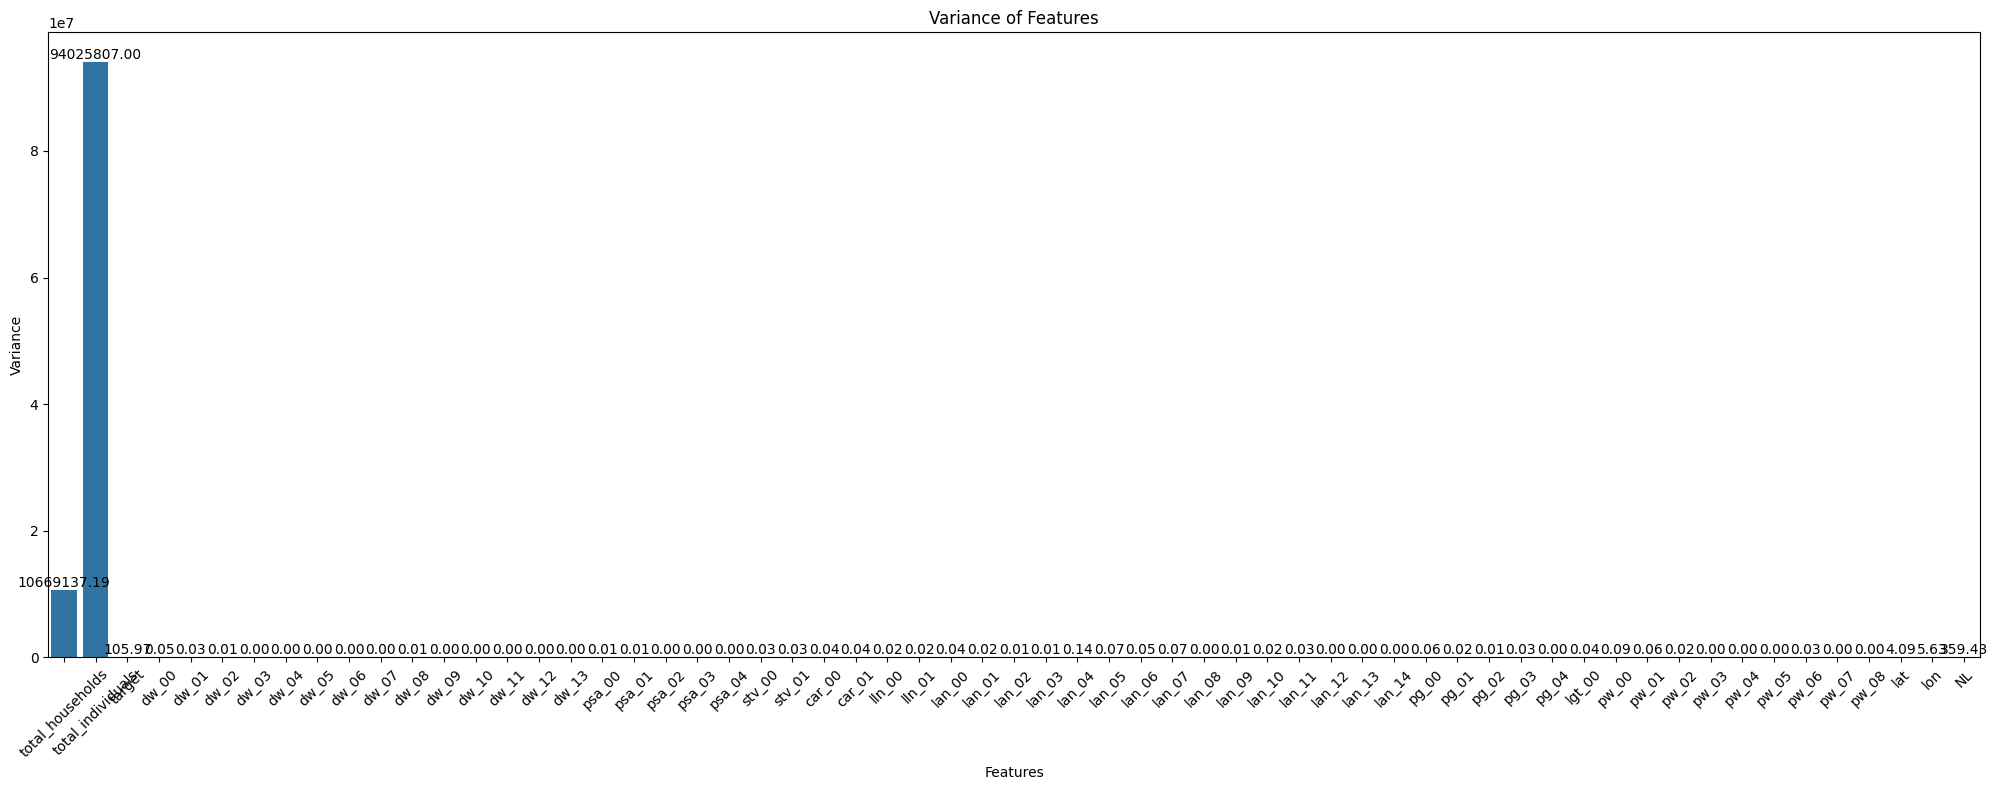

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numerical_features = [col for col in train.columns if train[col].dtype != 'O']

feature_var = train[numerical_features].var()

plt.figure(figsize=(20, 8))
bar_plot = sns.barplot(x=feature_var.index, y=feature_var.values)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance of Features")
plt.tight_layout()


for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

plt.show()

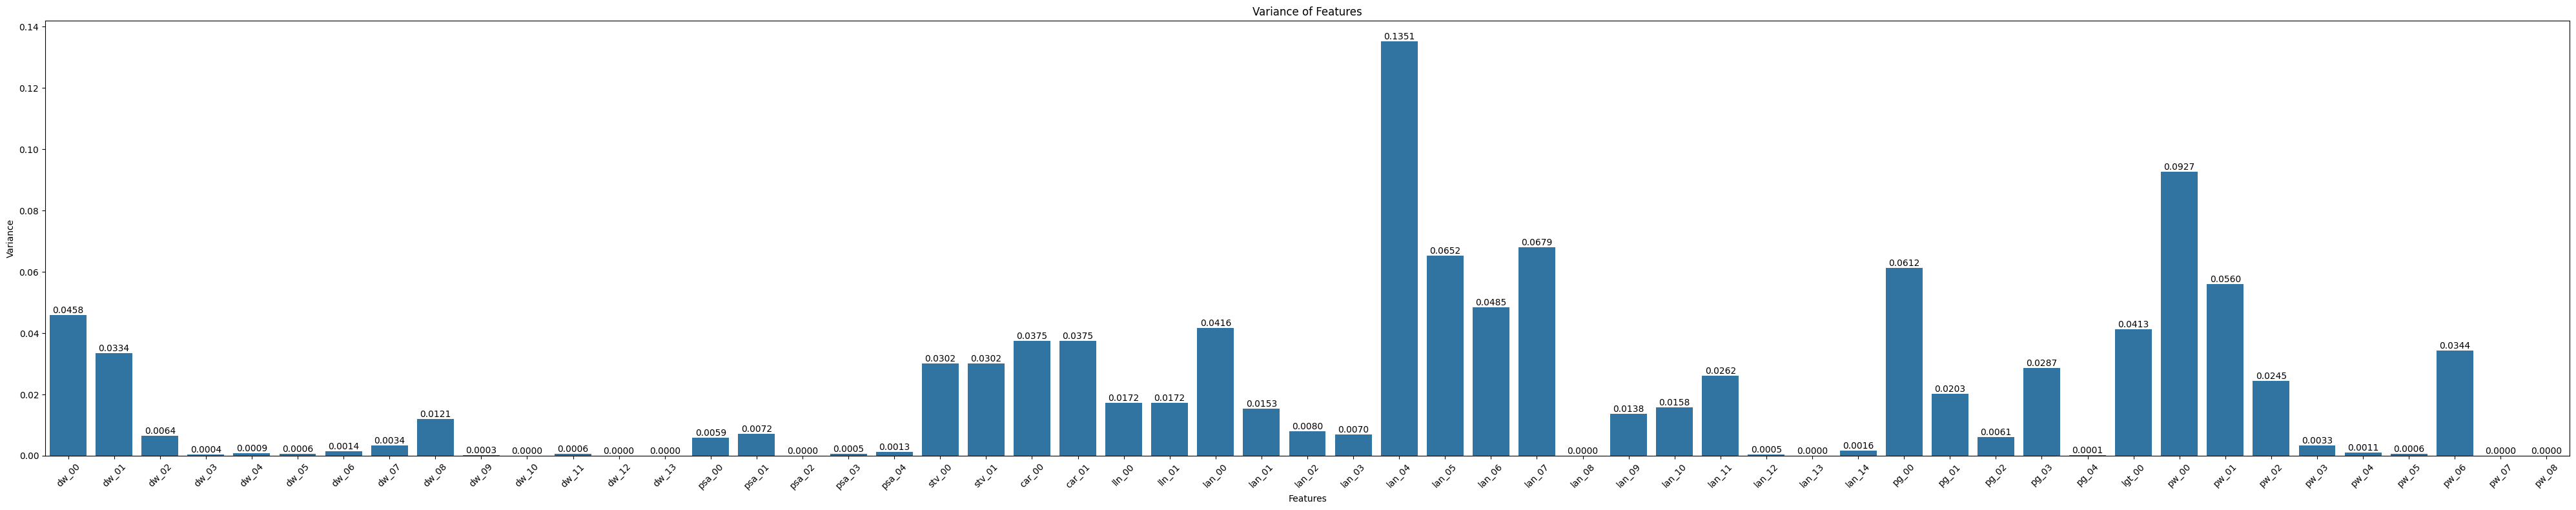

In [37]:
# filter based on the values  for feature_var

feature_var = feature_var[feature_var < 1]

plt.figure(figsize=(40, 8))
bar_plot = sns.barplot(x=feature_var.index, y=feature_var.values)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance of Features")
plt.tight_layout()


for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.4f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

plt.show()

In [38]:
from sklearn.feature_selection import VarianceThreshold

numerical_features = [col for col in train.columns if train[col].dtype != 'O']


constant_filter = VarianceThreshold(threshold=0.001)
constant_filter.fit(train[numerical_features])

constant_columns = [
    column for column in numerical_features
    if column not in np.array(numerical_features)[constant_filter.get_support()]
]
print(*constant_columns)

train.drop(labels=constant_columns, axis=1, inplace=True)
test.drop(labels=constant_columns, axis=1, inplace=True)

dw_03 dw_04 dw_05 dw_09 dw_10 dw_11 dw_12 dw_13 psa_02 psa_03 lan_08 lan_12 lan_13 pg_04 pw_05 pw_07 pw_08


In [39]:
from IPython.display import display, Markdown

display(Markdown("### 🔒 **Constant Features Detected**\nBelow are the features that have constant values across all records:"))

for column in constant_columns:
    description = var_def_dict.get(column, "No description available.")
    display(Markdown(f"🔹 **`{column}`** — *{description}*"))


### 🔒 **Constant Features Detected**
Below are the features that have constant values across all records:

🔹 **`dw_03`** — *Percentage of dwellings of type: Cluster house in complex*

🔹 **`dw_04`** — *Percentage of dwellings of type: Townhouse (semi-detached house in a complex)*

🔹 **`dw_05`** — *Percentage of dwellings of type: Semi-detached house*

🔹 **`dw_09`** — *Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat*

🔹 **`dw_10`** — *Percentage of dwellings of type: Caravan/tent*

🔹 **`dw_11`** — *Percentage of dwellings of type: Other*

🔹 **`dw_12`** — *Percentage of dwellings of type: Unspecified*

🔹 **`dw_13`** — *Percentage of dwellings of type: Not applicable*

🔹 **`psa_02`** — *Percentage listing present school attendance as:  Do not know*

🔹 **`psa_03`** — *Percentage listing present school attendance as:  Unspecified*

🔹 **`lan_08`** — *Percentage listing language as:  Sign language*

🔹 **`lan_12`** — *Percentage listing language as:  Other*

🔹 **`lan_13`** — *Percentage listing language as:  Unspecified*

🔹 **`pg_04`** — *Percentage in population group:  Other*

🔹 **`pw_05`** — *Percentage with piped water access:  Piped (tap) water on community stand: distance greater than 1000m (1km) from dwelling/institution*

🔹 **`pw_07`** — *Percentage with piped water access:  Unspecified*

🔹 **`pw_08`** — *Percentage with piped water access:  Not applicable*

In [40]:
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_06,dw_07,dw_08,...,pw_00,pw_01,pw_02,pw_03,pw_04,pw_06,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.005750,0.031466,0.008080,...,0.742692,0.214027,0.019968,0.002848,0.007537,0.012928,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.007575,0.123547,0.151910,...,0.309294,0.576844,0.018946,0.014566,0.057127,0.004131,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.006686,0.022632,0.129902,...,0.323393,0.483376,0.083010,0.057560,0.010358,0.040881,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.005255,0.068909,0.218786,...,0.677437,0.314194,0.002689,0.000000,0.000669,0.005011,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.004985,0.009150,0.015382,...,0.771106,0.194743,0.009699,0.004859,0.001290,0.017629,ZA4161005,-29.409381,25.290165,0.000000


### Modelling After Constant Feature removed

In [43]:
training_feature = [col for col in train.select_dtypes("number").columns if col != "target"]

X, y = train[training_feature], train["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    RandomForestRegressor(),
    CatBoostRegressor(),
    XGBRegressor(),
    LGBMRegressor()
]

for model in models:
    if isinstance(model, CatBoostRegressor):
        model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"{model.__class__.__name__} RMSE: {np.sqrt(mse)}")
        print("======================================")


RandomForestRegressor RMSE: 3.326123616382489
Learning rate set to 0.057863
0:	learn: 9.9622191	test: 9.5186624	best: 9.5186624 (0)	total: 11.7ms	remaining: 11.7s
100:	learn: 3.1236927	test: 3.3825749	best: 3.3825749 (100)	total: 1.16s	remaining: 10.4s
200:	learn: 2.5538637	test: 3.2084868	best: 3.2084868 (200)	total: 2.29s	remaining: 9.09s
300:	learn: 2.0943356	test: 3.1046888	best: 3.1046888 (300)	total: 3.42s	remaining: 7.94s
400:	learn: 1.7861757	test: 3.0556196	best: 3.0556196 (400)	total: 4.54s	remaining: 6.78s
500:	learn: 1.5306242	test: 3.0321442	best: 3.0321426 (499)	total: 5.67s	remaining: 5.64s
600:	learn: 1.3254104	test: 3.0088092	best: 3.0088092 (600)	total: 6.8s	remaining: 4.51s
700:	learn: 1.1447612	test: 2.9998044	best: 2.9992331 (699)	total: 8.65s	remaining: 3.69s
800:	learn: 1.0046000	test: 2.9901023	best: 2.9898623 (799)	total: 11.1s	remaining: 2.76s
900:	learn: 0.8827538	test: 2.9887857	best: 2.9860992 (830)	total: 12.4s	remaining: 1.36s
999:	learn: 0.7775134	test: 

## remove highly correleated features


In [ ]:

numerical_features = [col for col in train.columns if train[col].dtype != 'O']
corr_matrix = train[numerical_features].corr()

# upper matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

train.drop(labels=to_drop, axis=1, inplace=True)
test.drop(labels=to_drop, axis=1, inplace=True)

In [ ]:
to_drop

['total_individuals', 'stv_01', 'car_01', 'lln_01']

In [ ]:
all_data = pd.concat([train, test], axis=0)

nums_features = [col for col in all_data.columns if all_data[col].dtype != 'O']
nums_features.remove("target")

# scaler nums_features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
all_data[nums_features] = scaler.fit_transform(all_data[nums_features])

train = all_data[~all_data["target"].isna()]
test = all_data[all_data["target"].isna()]

In [ ]:
train.head()

,ward,total_households,target,dw_00,dw_01,dw_02,dw_06,dw_07,dw_08,psa_00,...,pw_00,pw_01,pw_02,pw_03,pw_04,pw_06,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,0.042169,16.773757,0.938570,0.000858,0.005768,0.013754,0.069032,0.009617,0.463306,...,0.745745,0.228272,0.019968,0.007310,0.024568,0.013008,ZA4161001,0.404243,0.495379,0.004636
1,41601002: Ward 2,0.043745,21.496661,0.700469,0.001271,0.004625,0.018119,0.271047,0.180798,0.516791,...,0.310565,0.615238,0.018946,0.037387,0.186210,0.004157,ZA4161002,0.449868,0.496807,0.050917
2,41601003: Ward 3,0.060543,10.931425,0.814649,0.004584,0.009341,0.015994,0.049652,0.154605,0.331972,...,0.324722,0.515549,0.083010,0.147740,0.033764,0.041134,ZA4161003,0.448007,0.517701,0.000000
3,41601004: Ward 4,0.043841,23.119257,0.663255,0.000000,0.006440,0.012571,0.151177,0.260393,0.500766,...,0.680221,0.335106,0.002689,0.000000,0.002182,0.005042,ZA4161004,0.429385,0.508307,0.032362
4,41601005: Ward 5,0.043582,13.652252,0.955388,0.000664,0.001547,0.011923,0.020074,0.018307,0.350228,...,0.774276,0.207705,0.009699,0.012471,0.004205,0.017739,ZA4161005,0.426359,0.529881,0.000000


In [ ]:
train.shape

(2822, 42)

In [ ]:
# split data

training_features = [col for col in train.select_dtypes("number").columns]
training_features.remove("target")

X = train[training_features]

y = train["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,target
0,16.773757
1,21.496661
2,10.931425
3,23.119257
4,13.652252
...,...
2817,6.393480
2818,15.668000
2819,13.238795
2820,17.639523


In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# eval
y_pred = linear_model.predict(X_eval)
mse = mean_squared_error(y_eval, y_pred)
print(f"MSE: {sqrt(mse)}")

MSE: 3.7523647352086593


In [ ]:
# random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_eval)
mse = mean_squared_error(y_eval, y_pred)
print(f"MSE: {sqrt(mse)}")

MSE: 3.322765734832868


In [ ]:
# catboost
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, loss_function='RMSE', verbose=100)

cat_model.fit(X_train, y_train, eval_set=(X_eval, y_eval), early_stopping_rounds=100, verbose=100)

y_pred = cat_model.predict(X_eval)
mse = mean_squared_error(y_eval, y_pred)
print(f"MSE: {sqrt(mse)}")

0:	learn: 10.0051819	test: 9.5698554	best: 9.5698554 (0)	total: 73.1ms	remaining: 1m 12s
100:	learn: 3.2691468	test: 3.4491429	best: 3.4491429 (100)	total: 2.23s	remaining: 19.8s
200:	learn: 2.7244617	test: 3.2675677	best: 3.2675677 (200)	total: 4.47s	remaining: 17.8s
300:	learn: 2.2863060	test: 3.1465806	best: 3.1465806 (300)	total: 5.78s	remaining: 13.4s
400:	learn: 1.9705891	test: 3.0941051	best: 3.0936940 (395)	total: 6.97s	remaining: 10.4s
500:	learn: 1.7202157	test: 3.0689462	best: 3.0689462 (500)	total: 8.87s	remaining: 8.83s
600:	learn: 1.5214180	test: 3.0460430	best: 3.0460430 (600)	total: 10s	remaining: 6.64s
700:	learn: 1.3395201	test: 3.0333104	best: 3.0328156 (699)	total: 10.8s	remaining: 4.62s
800:	learn: 1.1945435	test: 3.0206582	best: 3.0206582 (800)	total: 11.6s	remaining: 2.89s
900:	learn: 1.0682317	test: 3.0131478	best: 3.0128436 (896)	total: 12.4s	remaining: 1.37s
999:	learn: 0.9650754	test: 3.0101317	best: 3.0101317 (999)	total: 13.3s	remaining: 0us

bestTest = 3.0

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
test_preds = np.zeros(len(test))

scores = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    cat_model = CatBoostRegressor(iterations=5000, learning_rate=0.01, depth=6, loss_function='RMSE', verbose=100,
                                  early_stopping_rounds=100
                                  )

    cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=100)

    y_pred = cat_model.predict(X_test)

    test_preds += cat_model.predict(test[X.columns])/ cv.n_splits
    mse = mean_squared_error(y_test, y_pred)
    scores.append(sqrt(mse))
    print("*************************")
    print(f"MSE: {sqrt(mse)}")
    print("*************************")

print(f"Mean MSE: {sum(scores) / len(scores)}")

0:	learn: 10.3052372	test: 9.8596344	best: 9.8596344 (0)	total: 10.3ms	remaining: 51.4s
100:	learn: 5.7612284	test: 5.4210809	best: 5.4210809 (100)	total: 834ms	remaining: 40.4s
200:	learn: 4.2328874	test: 4.0598504	best: 4.0598504 (200)	total: 1.67s	remaining: 39.9s
300:	learn: 3.6742745	test: 3.6530902	best: 3.6530902 (300)	total: 2.51s	remaining: 39.2s
400:	learn: 3.4107804	test: 3.5008862	best: 3.5008862 (400)	total: 3.35s	remaining: 38.4s
500:	learn: 3.2421840	test: 3.4216627	best: 3.4216627 (500)	total: 4.17s	remaining: 37.5s
600:	learn: 3.1101974	test: 3.3648379	best: 3.3648379 (600)	total: 4.99s	remaining: 36.5s
700:	learn: 2.9973109	test: 3.3175141	best: 3.3175141 (700)	total: 5.81s	remaining: 35.6s
800:	learn: 2.8956990	test: 3.2802825	best: 3.2802825 (800)	total: 6.63s	remaining: 34.8s
900:	learn: 2.7864721	test: 3.2391822	best: 3.2391822 (900)	total: 7.47s	remaining: 34s
1000:	learn: 2.6870963	test: 3.2069231	best: 3.2069231 (1000)	total: 8.5s	remaining: 34s
1100:	learn: 2.

<Axes: ylabel='Feature Id'>

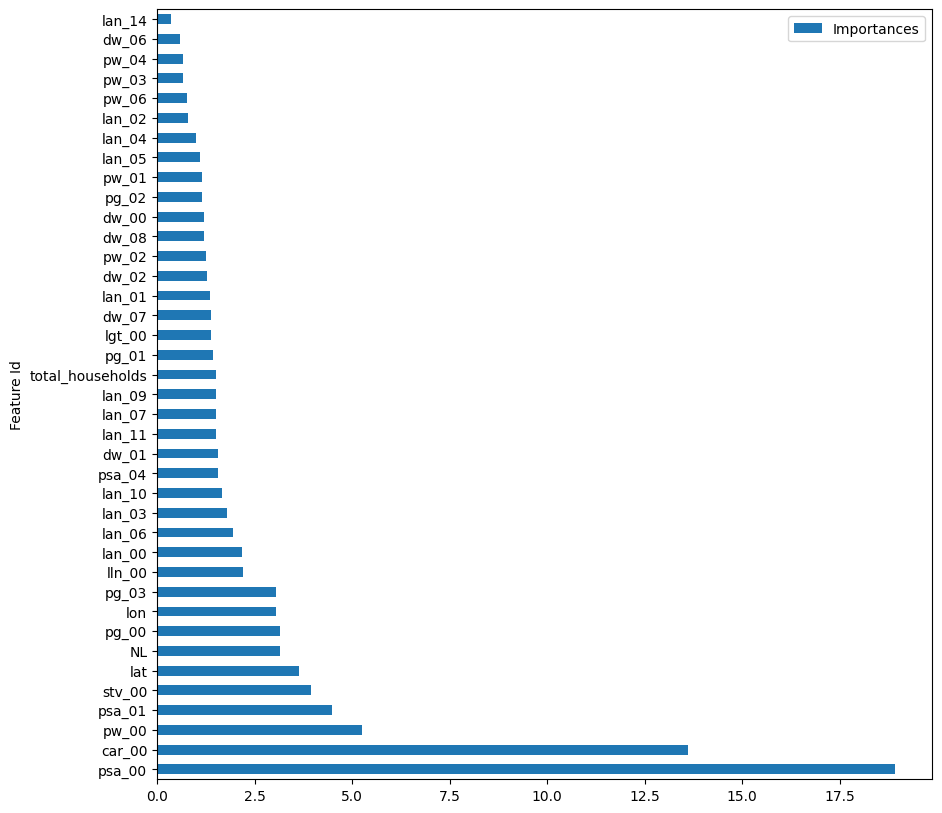

In [ ]:
# Features importance
importances = cat_model.get_feature_importance(prettified=True)
importances.plot(kind="barh", x="Feature Id", y="Importances", figsize=(10, 10))

In [ ]:
sum(scores) / len(scores)

3.1102256762607885

In [ ]:
test["target"] = test_preds
test[["ward", "target"]].to_csv("submission_cat_model_only_0.001_ratio_tuned_scaling_feature_selection.csv", index=False)

<ipython-input-42-87a40a438275>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["target"] = test_preds
